In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from exemplars import Exemplars
from hopfield_network import HopfieldNetwork

random.seed(1234321)

### Programming Assignment 2###

Neural Networks:  605.447

Christopher Jeschke  
cjeschke@gmail.com

_For this assignment, implement the Hopfield Network that is based on 8 exemplars, each 100 elements in length.  These exemplars are to be displayed in a 10x10 rasterized array and should depict the first 8 numerals: 0 - 7._

First we'll show a call to the exemplar generation module and display the exemplars so the training data set is understood and visualized.  The exemplars are generated by the python module 'exemplars', authored for this assignment.

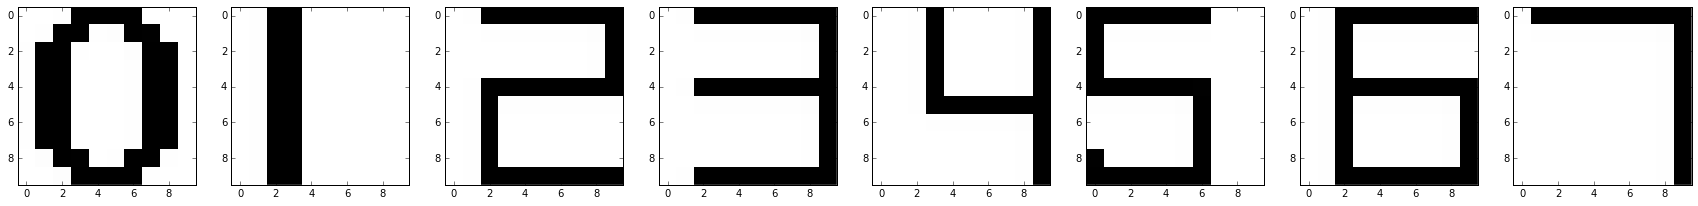

In [2]:
exemplars = Exemplars.get_exemplars()[0:8]

figure, axes = plt.subplots(1, len(exemplars), figsize=(30,30))
for i in range(0, len(exemplars)):
    axes[i].imshow(Exemplars.to_matrix(exemplars[i]), cmap='Greys', interpolation='None')

Now we'll initialize the Hopfield Network using the exemplars, completing a few checks to confirm the structure of resulting weight matrix is consistent with our expectations:
- Is the matrix the correct size?  It should be 100 x 100
- Is the diagonal 0?  That is, does $w_{ij} = 0$ when $i = j$?
- Is it symmetric?  That is, does $w_{ij} = w_{ji}$ when $i \neq j$?

In [3]:
network = HopfieldNetwork(exemplars)

assert(len(network.weight_matrix) == 100)
assert(len(network.weight_matrix[0]) == 100)

# Check that the diagonal is 0
for i in range(0, 100):
    assert(network.weight_matrix[i][i] == 0)
    
# Symmetric
assert(np.allclose(network.weight_matrix, network.weight_matrix.T) == True)
print network.weight_matrix

[[ 0  6 -2 ...,  0  0 -4]
 [ 6  0  0 ..., -2 -2 -2]
 [-2  0  0 ...,  2  2  2]
 ..., 
 [ 0 -2  2 ...,  0  8  4]
 [ 0 -2  2 ...,  8  0  4]
 [-4 -2  2 ...,  4  4  0]]


We've confirmed our weight matrix is 100x100, has only 0 values on the diagonal, and is symmetric.

----

_The output of this program should display the sequence of iterates displayed in the 10x10 array in similar fashion as the examples shown in Lippman's paper "Introduction to Neural Networks".  Display at least two sequences of displays each sequence starting with a noisy version of one of the exemplars.  Feel free to experiment._ 

For purposes of demonstrating the ability of the Hopfield network to recall the original exemplar given a noisy version, we'll try our experiment with noisy versions of $0$ and $3$. We'll generate new exemplars $0^{\prime}$ and $3^{\prime}$ by applying the approach in _Lippman's "Introduction to Neural Networks"_, which is to randomly reverse each element in the original exemplar vector with a probability of .25.

**Experiment 1**:  Noisy $0$

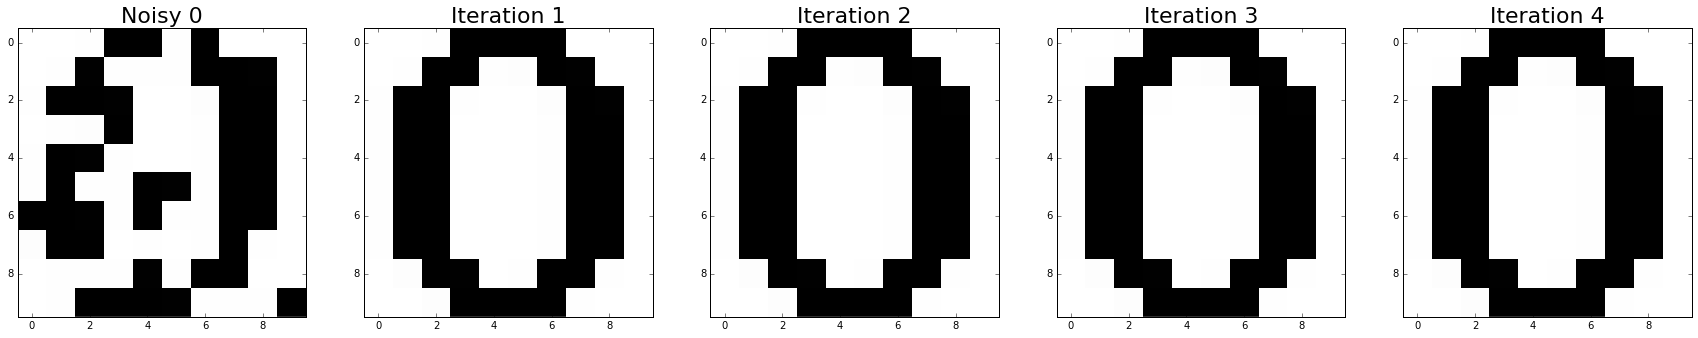

In [4]:
noisy_zero = Exemplars.add_noise(exemplars[0])

figure, axes = plt.subplots(1, 5, figsize=(30,30))
axes[0].imshow(Exemplars.to_matrix(noisy_zero), cmap='Greys', interpolation='None')
axes[0].set_title("Noisy 0", fontdict={'fontsize':22})

p = noisy_zero
for i in range(1, 5):
    p = network.recall(p)
    axes[i].imshow(Exemplars.to_matrix(p), cmap='Greys', interpolation='None')
    axes[i].set_title("Iteration {0}".format(i), fontdict={'fontsize':22})

**Experiment 2:** Noisy $3$

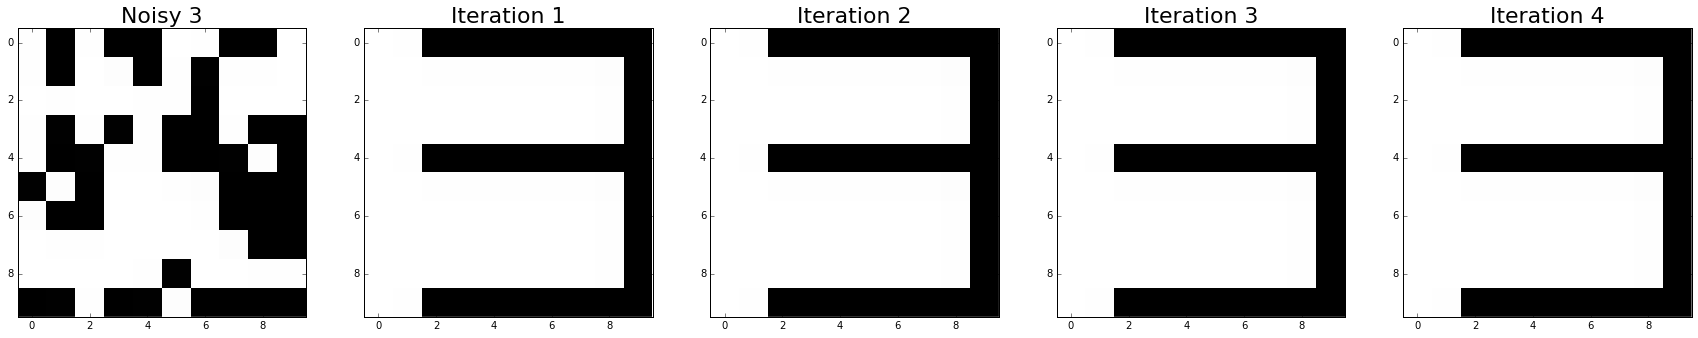

In [5]:
noisy_three = Exemplars.add_noise(exemplars[3])

figure, axes = plt.subplots(1, 5, figsize=(30,30))
axes[0].imshow(Exemplars.to_matrix(noisy_three), cmap='Greys', interpolation='None')
axes[0].set_title("Noisy 3", fontdict={'fontsize':22})

p = noisy_three
for i in range(1, 5):
    p = network.recall(p)
    axes[i].imshow(Exemplars.to_matrix(p), cmap='Greys', interpolation='None')
    axes[i].set_title("Iteration {0}".format(i), fontdict={'fontsize':22})

We can see the network has successfully recovered the original **0** and **3** from their noisy versions, demonstrating that - for at least those particular exemplars - the network functions as desired. Now we can consider what happens when attempting to recover other exemplars.  Lets expand our experimentation to include the numbers **4** and **6**.

**Experiment 3:** Noisy $4$

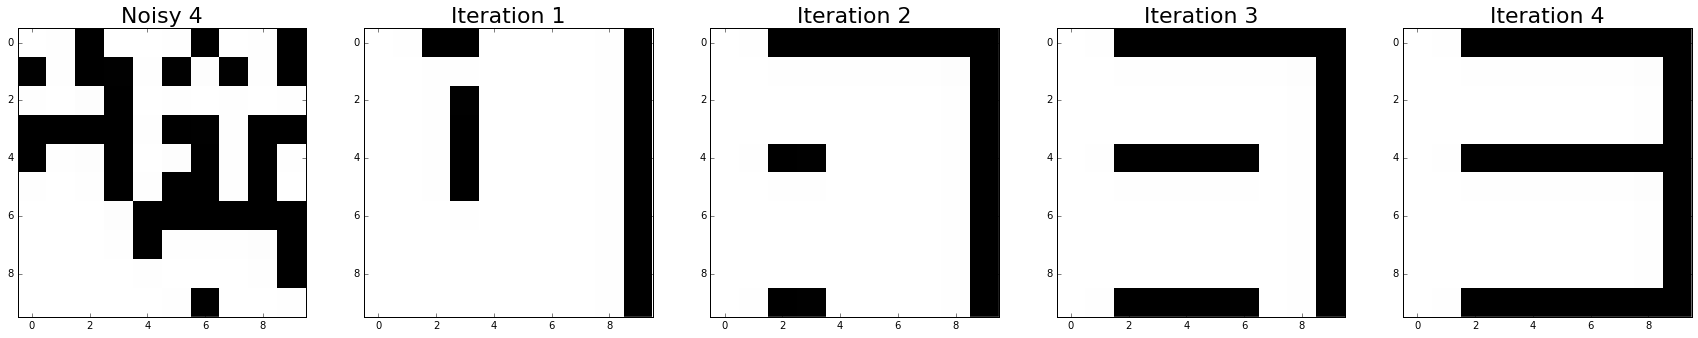

In [6]:
noisy_four = Exemplars.add_noise(exemplars[4])

figure, axes = plt.subplots(1, 5, figsize=(30,30))
axes[0].imshow(Exemplars.to_matrix(noisy_four), cmap='Greys', interpolation='None')
axes[0].set_title("Noisy 4", fontdict={'fontsize':22})

p = noisy_four
for i in range(1, 5):
    p = network.recall(p)
    axes[i].imshow(Exemplars.to_matrix(p), cmap='Greys', interpolation='None')
    axes[i].set_title("Iteration {0}".format(i), fontdict={'fontsize':22})

**Experiment 4:** Noisy 6

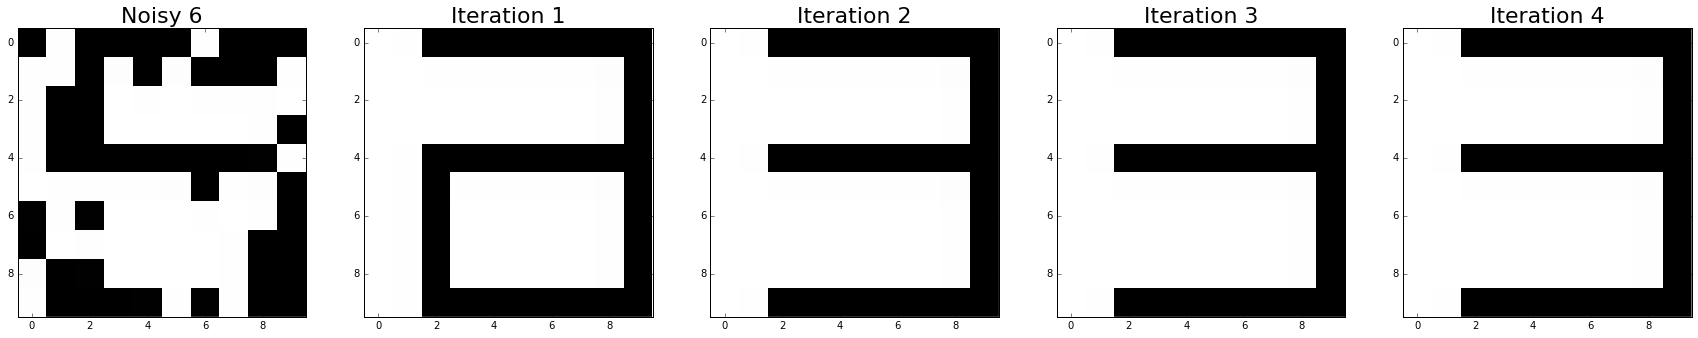

In [7]:
noisy_six = Exemplars.add_noise(exemplars[6])

figure, axes = plt.subplots(1, 5, figsize=(30,30))
axes[0].imshow(Exemplars.to_matrix(noisy_six), cmap='Greys', interpolation='None')
axes[0].set_title("Noisy 6", fontdict={'fontsize':22})

p = noisy_six
for i in range(1, 5):
    p = network.recall(p)
    axes[i].imshow(Exemplars.to_matrix(p), cmap='Greys', interpolation='None')
    axes[i].set_title("Iteration {0}".format(i), fontdict={'fontsize':22})

Now we begin to see how the similarity between the exemplars is making their retrieval difficult. There is a strong attraction towards 3. For our next 2 experiments, lets try the original exemplars for **4** and **6** (no noise) to see if they can be recovered.

**Experiment 5:** Original 4

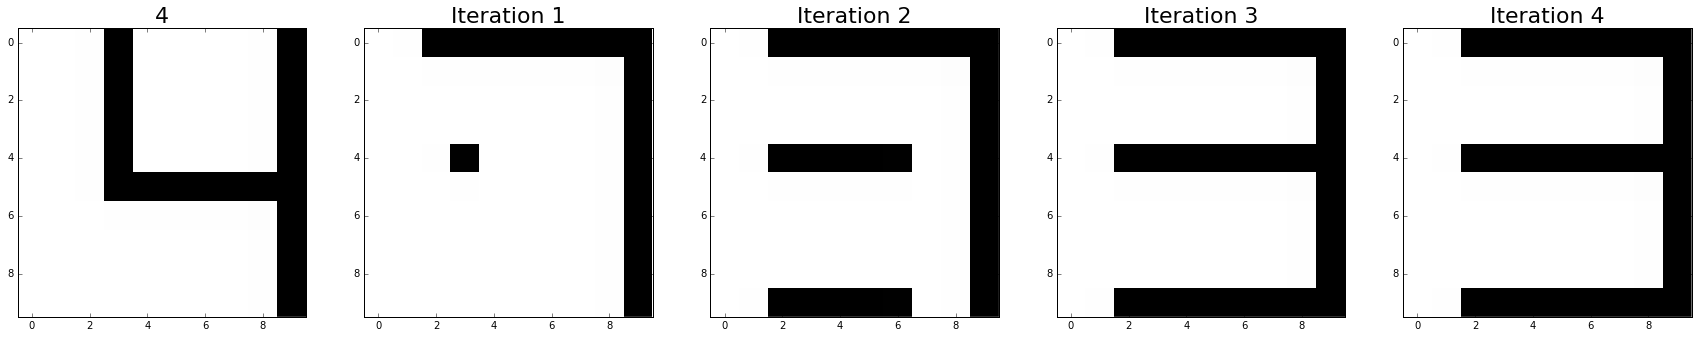

In [8]:
four = exemplars[4]
figure, axes = plt.subplots(1, 5, figsize=(30,30))
axes[0].imshow(Exemplars.to_matrix(four), cmap='Greys', interpolation='None')
axes[0].set_title("4", fontdict={'fontsize':22})

p = four
for i in range(1, 5):
    p = network.recall(p)
    axes[i].imshow(Exemplars.to_matrix(p), cmap='Greys', interpolation='None')
    axes[i].set_title("Iteration {0}".format(i), fontdict={'fontsize':22})

**Experiment 6:** Original 6

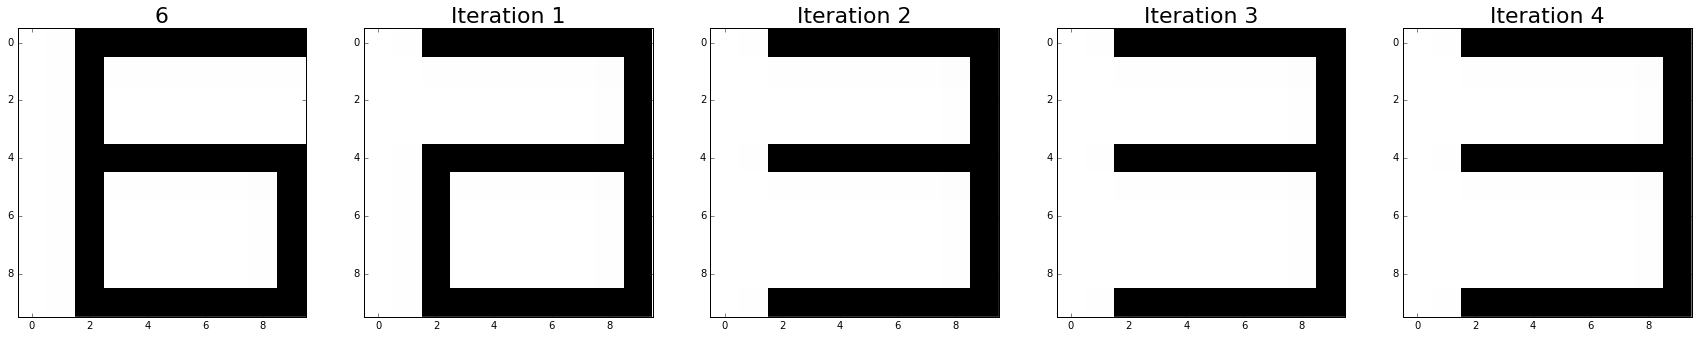

In [9]:
six = exemplars[6]
figure, axes = plt.subplots(1, 5, figsize=(30,30))
axes[0].imshow(Exemplars.to_matrix(six), cmap='Greys', interpolation='None')
axes[0].set_title("6", fontdict={'fontsize':22})

p = six
for i in range(1, 5):
    p = network.recall(p)
    axes[i].imshow(Exemplars.to_matrix(p), cmap='Greys', interpolation='None')
    axes[i].set_title("Iteration {0}".format(i), fontdict={'fontsize':22})

---

**Summary**

While the Hopfield Network may be a convenient, elegant method for information retrieval when confronted with noisy data, the actual effectiveness is restricted by the degree of similarity between the exemplars used to train the network to begin with.  While we successfully retrieved **0** and **3** using their noisy variants, subsequent experiments made it obvious that - with the exception of 0 - other exemplars (noisy or not) will result in **3** being returned by the network after several iterations. 

Hopfield had identified that an exemplar pattern will be _unstable_ if it shares many bits in common with another exemplar pattern.  We can see quite clearly that **2**, **3**, **4**, **5** and **6** all share several elements in common - spanning the top, middle and bottom rows, as well as the rightmost column.  Thus attempts to recover a **6** gravitate quickly towards **3** because of the strong similarity in the characters to begin with.

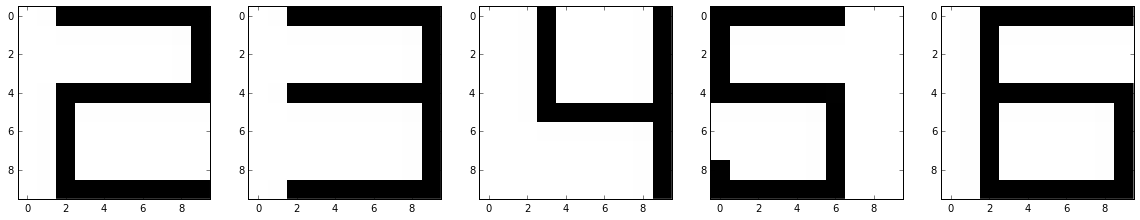

In [10]:
figure, axes = plt.subplots(1, 5, figsize=(20,20))
axes[0].imshow(Exemplars.to_matrix(exemplars[2]), cmap='Greys', interpolation='None')
axes[1].imshow(Exemplars.to_matrix(exemplars[3]), cmap='Greys', interpolation='None')
axes[2].imshow(Exemplars.to_matrix(exemplars[4]), cmap='Greys', interpolation='None')
axes[3].imshow(Exemplars.to_matrix(exemplars[5]), cmap='Greys', interpolation='None')
axes[4].imshow(Exemplars.to_matrix(exemplars[6]), cmap='Greys', interpolation='None')